# Case Study (Medals in the Summer Olympics)

In [1]:
# Import pandas
import pandas as pd

dpath = 'data/dc10/summer-olympic-medals/'

## Loading Olympic edition DataFrame

In this chapter, you'll be using [The Guardian's Olympic medal dataset](https://www.theguardian.com/sport/datablog/2012/jun/25/olympic-medal-winner-list-data).

Your first task here is to prepare a DataFrame editions from a tab-separated values (TSV) file.

Initially, editions has 26 rows (one for each Olympic edition, i.e., a year in which the Olympics was held) and 7 columns: 'Edition', 'Bronze', 'Gold', 'Silver', 'Grand Total', 'City', and 'Country'.

For the analysis that follows, you won't need the overall medal counts, so you want to keep only the useful columns from editions: 'Edition', 'Grand Total', City, and Country.

In [3]:
# Create file path: file_path
file_path = 'Summer Olympic medalists 1896 to 2008 - EDITIONS.tsv'

# Load DataFrame from file_path: editions
editions = pd.read_csv(dpath+file_path, sep='\t')

# Extract the relevant columns: editions
editions = editions[['Edition', 'Grand Total', 'City', 'Country']]

# Print editions DataFrame
editions

,Edition,Grand Total,City,Country
0,1896,151,Athens,Greece
1,1900,512,Paris,France
2,1904,470,St. Louis,United States
3,1908,804,London,United Kingdom
4,1912,885,Stockholm,Sweden
5,1920,1298,Antwerp,Belgium
6,1924,884,Paris,France
7,1928,710,Amsterdam,Netherlands
8,1932,615,Los Angeles,United States
9,1936,875,Berlin,Germany


## Loading IOC codes DataFrame

Your task here is to prepare a DataFrame `ioc_codes` from a comma-separated values (CSV) file.

Initially, ioc_codes has 200 rows (one for each country) and 3 columns: 'Country', 'NOC', & 'ISO code'.

For the analysis that follows, you want to keep only the useful columns from ioc_codes: 'Country' and 'NOC' (the column 'NOC' contains three-letter codes representing each country).

In [4]:
# Create the file path: file_path
file_path = 'Summer Olympic medalists 1896 to 2008 - IOC COUNTRY CODES.csv'

# Load DataFrame from file_path: ioc_codes
ioc_codes = pd.read_csv(dpath+file_path)

# Extract the relevant columns: ioc_codes
ioc_codes = ioc_codes[['Country', 'NOC']]

# Print first and last 5 rows of ioc_codes
print(ioc_codes.head())
print(ioc_codes.tail())

           Country  NOC
0      Afghanistan  AFG
1          Albania  ALB
2          Algeria  ALG
3  American Samoa*  ASA
4          Andorra  AND
             Country  NOC
196          Vietnam  VIE
197  Virgin Islands*  ISV
198            Yemen  YEM
199           Zambia  ZAM
200         Zimbabwe  ZIM


## Building medals DataFrame

Here, you'll start with the DataFrame `editions` from the previous exercise.

You have a sequence of files summer_1896.csv, summer_1900.csv, ..., summer_2008.csv, one for each Olympic edition (year).

You will build up a dictionary `medals_dict` with the Olympic editions (years) as keys and DataFrames as values.

The dictionary is built up inside a loop over the year of each Olympic edition (from the Index of editions).

Once the dictionary of DataFrames is built up, you will combine the DataFrames using `pd.concat()`.

In [6]:
# Create empty dictionary: medals_dict
medals_dict = {}

for year in editions['Edition']:

    # Create the file path: file_path
    #file_path = 'summer_{:d}.csv'.format(year)
    
    # Load file_path into a DataFrame: medals_dict[year]
    #medals_dict[year] = pd.read_csv(dpath+file_path)
    
    # Extract relevant columns: medals_dict[year]
    #medals_dict[year] = medals_dict[year][['Athlete', 'NOC', 'Medal']]
    
    # Assign year to column 'Edition' of medals_dict
    #medals_dict[year]['Edition'] = year

FileNotFoundError: File b'data/dc10/summer-olympic-medals/summer_1896.csv' does not exist

In [ ]:
# Concatenate medals_dict: medals
medals = pd.concat(medals_dict, ignore_index=True)

In [7]:
# As I do not have source datasets, here is the medals dataset compiled
# Load DataFrame from file_path: ioc_codes
medals = pd.read_csv(dpath+'medals.csv')

In [8]:
# Print first and last 5 rows of medals
print(medals.head())
print(medals.tail())

   Unnamed: 0             Athlete  NOC   Medal  Edition
0           0       HAJOS, Alfred  HUN    Gold     1896
1           1    HERSCHMANN, Otto  AUT  Silver     1896
2           2   DRIVAS, Dimitrios  GRE  Bronze     1896
3           3  MALOKINIS, Ioannis  GRE    Gold     1896
4           4  CHASAPIS, Spiridon  GRE  Silver     1896
       Unnamed: 0               Athlete  NOC   Medal  Edition
29211       29211        ENGLICH, Mirko  GER  Silver     2008
29212       29212  MIZGAITIS, Mindaugas  LTU  Bronze     2008
29213       29213       PATRIKEEV, Yuri  ARM  Bronze     2008
29214       29214         LOPEZ, Mijain  CUB    Gold     2008
29215       29215        BAROEV, Khasan  RUS  Silver     2008


## Counting medals by country/edition in a pivot table

Here, you'll start with the concatenated DataFrame `medals` from the previous exercise.

You can construct a **pivot table** to see the number of medals each country won in each year. The result is a new DataFrame with the Olympic edition on the Index and with 138 country NOC codes as columns.

In [9]:
# Construct the pivot_table: medal_counts
medal_counts = medals.pivot_table(aggfunc='count', index='Edition', values='Athlete', columns='NOC')

# Print the first & last 5 rows of medal_counts
print(medal_counts.head())
print(medal_counts.tail())

NOC      AFG  AHO  ALG   ANZ  ARG  ARM  AUS   AUT  AZE  BAH  ...   URS  URU  \
Edition                                                      ...              
1896     NaN  NaN  NaN   NaN  NaN  NaN  2.0   5.0  NaN  NaN  ...   NaN  NaN   
1900     NaN  NaN  NaN   NaN  NaN  NaN  5.0   6.0  NaN  NaN  ...   NaN  NaN   
1904     NaN  NaN  NaN   NaN  NaN  NaN  NaN   1.0  NaN  NaN  ...   NaN  NaN   
1908     NaN  NaN  NaN  19.0  NaN  NaN  NaN   1.0  NaN  NaN  ...   NaN  NaN   
1912     NaN  NaN  NaN  10.0  NaN  NaN  NaN  14.0  NaN  NaN  ...   NaN  NaN   

NOC        USA  UZB  VEN  VIE  YUG  ZAM  ZIM   ZZX  
Edition                                             
1896      20.0  NaN  NaN  NaN  NaN  NaN  NaN   6.0  
1900      55.0  NaN  NaN  NaN  NaN  NaN  NaN  34.0  
1904     394.0  NaN  NaN  NaN  NaN  NaN  NaN   8.0  
1908      63.0  NaN  NaN  NaN  NaN  NaN  NaN   NaN  
1912     101.0  NaN  NaN  NaN  NaN  NaN  NaN   NaN  

[5 rows x 138 columns]
NOC      AFG  AHO  ALG  ANZ   ARG  ARM    AUS  AUT 

As you can see, the pivot table DataFrame has mostly NaN entries (because most countries do not win any medals in a given Olympic edition).

## Computing fraction of medals per Olympic edition

In this exercise, you'll start with the DataFrames `editions`, `medals`, & `medal_counts` from prior exercises.

You can extract a Series with the total number of medals awarded in each Olympic edition.

The DataFrame `medal_counts` can be divided row-wise by the total number of medals awarded each edition; the method `.divide()` performs the broadcast as you require.

This gives you a normalized indication of each country's performance in each edition.

In [10]:
# Set Index of editions: totals
totals = editions.set_index('Edition')

# Reassign totals['Grand Total']: totals
totals = totals['Grand Total']

# Divide medal_counts by totals: fractions
fractions = medal_counts.divide(totals, axis='rows')

# Print first & last 5 rows of fractions
print(fractions.head())
print(fractions.tail())

NOC      AFG  AHO  ALG       ANZ  ARG  ARM       AUS       AUT  AZE  BAH  \
Edition                                                                    
1896     NaN  NaN  NaN       NaN  NaN  NaN  0.013245  0.033113  NaN  NaN   
1900     NaN  NaN  NaN       NaN  NaN  NaN  0.009766  0.011719  NaN  NaN   
1904     NaN  NaN  NaN       NaN  NaN  NaN       NaN  0.002128  NaN  NaN   
1908     NaN  NaN  NaN  0.023632  NaN  NaN       NaN  0.001244  NaN  NaN   
1912     NaN  NaN  NaN  0.011299  NaN  NaN       NaN  0.015819  NaN  NaN   

NOC        ...     URS  URU       USA  UZB  VEN  VIE  YUG  ZAM  ZIM       ZZX  
Edition    ...                                                                 
1896       ...     NaN  NaN  0.132450  NaN  NaN  NaN  NaN  NaN  NaN  0.039735  
1900       ...     NaN  NaN  0.107422  NaN  NaN  NaN  NaN  NaN  NaN  0.066406  
1904       ...     NaN  NaN  0.838298  NaN  NaN  NaN  NaN  NaN  NaN  0.017021  
1908       ...     NaN  NaN  0.078358  NaN  NaN  NaN  NaN  NaN  NaN

## Computing percentage change in fraction of medals won

Here, you'll start with the DataFrames `editions`, `medals`, `medal_counts`, & `fractions` from prior exercises.

To see if there is a host country advantage, you first want to see how the fraction of medals won changes from edition to edition.

The expanding mean provides a way to see this down each column. It is the value of the mean with all the data available up to that point in time. If you are interested in learning more about pandas' expanding transformations, this section of the pandas documentation has additional information.

In [11]:
# Apply the expanding mean: mean_fractions
mean_fractions = fractions.expanding().mean()

# Compute the percentage change: fractions_change
fractions_change = mean_fractions.pct_change() * 100

# Reset the index of fractions_change: fractions_change
fractions_change = fractions_change.reset_index()

# Print first & last 5 rows of fractions_change
print(fractions_change.head())
print(fractions_change.tail())

NOC  Edition  AFG  AHO  ALG        ANZ  ARG  ARM        AUS        AUT  AZE  \
0       1896  NaN  NaN  NaN        NaN  NaN  NaN        NaN        NaN  NaN   
1       1900  NaN  NaN  NaN        NaN  NaN  NaN -13.134766 -32.304688  NaN   
2       1904  NaN  NaN  NaN        NaN  NaN  NaN   0.000000 -30.169386  NaN   
3       1908  NaN  NaN  NaN        NaN  NaN  NaN   0.000000 -23.013510  NaN   
4       1912  NaN  NaN  NaN -26.092774  NaN  NaN   0.000000   6.254438  NaN   

NOC    ...      URS  URU         USA  UZB  VEN  VIE  YUG  ZAM  ZIM        ZZX  
0      ...      NaN  NaN         NaN  NaN  NaN  NaN  NaN  NaN  NaN        NaN  
1      ...      NaN  NaN   -9.448242  NaN  NaN  NaN  NaN  NaN  NaN  33.561198  
2      ...      NaN  NaN  199.651245  NaN  NaN  NaN  NaN  NaN  NaN -22.642384  
3      ...      NaN  NaN  -19.549222  NaN  NaN  NaN  NaN  NaN  NaN   0.000000  
4      ...      NaN  NaN  -12.105733  NaN  NaN  NaN  NaN  NaN  NaN   0.000000  

[5 rows x 139 columns]
NOC  Edition  AFG  AH

## Building hosts DataFrame

Your task here is to prepare a DataFrame hosts by left joining editions and `ioc_codes`.

Once created, you will subset the Edition and NOC columns and set Edition as the Index.

There are some missing NOC values; you will set those explicitly.

Finally, you'll reset the Index & print the final DataFrame.

In [13]:
# Left join editions and ioc_codes: hosts
hosts = pd.merge(editions, ioc_codes, how='left')

# Extract relevant columns and set index: hosts
hosts = hosts[['Edition','NOC']].set_index('Edition')

# Fix missing 'NOC' values of hosts
print(hosts.loc[hosts.NOC.isnull()])
hosts.loc[1972, 'NOC'] = 'FRG'
hosts.loc[1980, 'NOC'] = 'URS'
hosts.loc[1988, 'NOC'] = 'KOR'

# Reset Index of hosts: hosts
hosts = hosts.reset_index()

# Print hosts
hosts

         NOC
Edition     
1972     NaN
1980     NaN
1988     NaN


,Edition,NOC
0,1896,GRE
1,1900,FRA
2,1904,USA
3,1908,GBR
4,1912,SWE
5,1920,BEL
6,1924,FRA
7,1928,NED
8,1932,USA
9,1936,GER


## Reshaping for analysis

This exercise starts off with `fractions_change` and `hosts` already loaded.

Your task here is to reshape the `fractions_change` DataFrame for later analysis.

Initially, `fractions_change` is a wide DataFrame of 26 rows (one for each Olympic edition) and 139 columns (one for the edition and 138 for the competing countries).

On reshaping with `pd.melt()`, as you will see, the result is a tall DataFrame with 3588 rows and 3 columns that summarizes the fractional change in the expanding mean of the percentage of medals won for each country in blocks.

In [15]:
# Reshape fractions_change: reshaped
reshaped = pd.melt(fractions_change, id_vars='Edition', value_name='Change')

# Print reshaped.shape and fractions_change.shape
print(reshaped.shape, fractions_change.shape)

# Extract rows from reshaped where 'NOC' == 'CHN': chn
chn = reshaped.loc[reshaped.NOC == 'CHN']

# Print last 5 rows of chn with .tail()
chn.tail()

(3588, 3) (26, 139)


,Edition,NOC,Change
567,1992,CHN,4.240630
568,1996,CHN,7.860247
569,2000,CHN,-3.851278
570,2004,CHN,0.128863
571,2008,CHN,13.251332


On looking at the hosting countries from the last 5 Olympic editions and the fractional change of medals won by China the last 5 editions, you can see that China fared significantly better in 2008 (i.e., when China was the host country).

## Merging to compute influence

This exercise starts off with the DataFrames reshaped and hosts in the namespace.

Your task is to merge the two DataFrames and tidy the result.

The end result is a DataFrame summarizing the fractional change in the expanding mean of the percentage of medals won for the host country in each Olympic edition.

In [18]:
# Merge reshaped and hosts: merged
merged = pd.merge(reshaped, hosts, how='inner')

# Print first 5 rows of merged
merged.head()

,Edition,NOC,Change
0,1956,AUS,54.615063
1,2000,AUS,12.554986
2,1920,BEL,54.757887
3,1976,CAN,-2.143977
4,2008,CHN,13.251332


In [19]:
# Set Index of merged and sort it: influence
influence = merged.set_index('Edition').sort_index()

# Print first 5 rows of influence
influence.head()

,NOC,Change
Edition,,
1896,GRE,NaN
1900,FRA,198.002486
1904,USA,199.651245
1908,GBR,134.489218
1912,SWE,71.896226


## Plotting influence of host country

This final exercise starts off with the DataFrames influence and editions in the namespace. Your job is to plot the influence of being a host country.

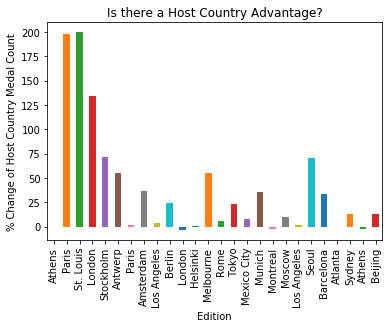

In [21]:
# Import pyplot
import matplotlib.pyplot as plt
%matplotlib inline

# Extract influence['Change']: change
change = influence['Change']

# Make bar plot of change: ax
ax = change.plot(kind='bar')

# Customize the plot to improve readability
ax.set_ylabel("% Change of Host Country Medal Count")
ax.set_title("Is there a Host Country Advantage?")
ax.set_xticklabels(editions['City'])

# Display the plot
plt.show();